<a href="https://colab.research.google.com/github/KartikDhande007/play_store_app_review_analysis/blob/main/capstone_project01_individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Capstone project- 1 Playstore App Play Store App Review Analysis***

## **Individual Collab Note Book**

## Create By :- **Kartik Dhande**

## **Exploring Play store data:**

In [2]:
#import library
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
from datetime import datetime
# plotly
import plotly 
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
#sns.set(font_scale=1.5)
warnings.filterwarnings("ignore")

## **Lets Explore play store DataFrame**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# loading csv File
file_path = '/content/drive/MyDrive/caspstone project/Play Store App Review Analysis/Play Store Data.csv'
ps_df=pd.read_csv(file_path)

In [5]:
# Display the Play Store App data
play_store=pd.concat([ps_df.head(),ps_df.tail()])
play_store

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# Finding the number of rows and columns in the given dataset
print(ps_df.columns)
rows=ps_df.shape[0]
columns=ps_df.shape[1]
print(f"the no of rows is {rows} and no of columns is {columns}")

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
the no of rows is 10841 and no of columns is 13


In [ ]:
ps_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


Let us first define what information the columns contain based on our inspection.

play_store dataframe has 10841 rows and 13 columns. The 13 columns are identified as below:

1.App - It tells us about the name of the application with a short description (optional).  
2.Category - It gives the category to the app.  
3.Rating - It contains the average rating the respective app received from its users.  
4.Reviews - It tells us about the total number of users who have given a review for the application.
5.Size - It tells us about the size being occupied the application on the mobile phone.  
6.Installs - It tells us about the total number of installs/downloads for an application.  
7.Type - IIt states whether an app is free to use or paid.  
8.Price - It gives the price payable to install the app. For free type apps, the price is zero.  
9.Content Rating - It states whether or not an app is suitable for all age groups or not.  
10.Genres - It tells us about the various other categories to which an application can belong.  
11.Last Updated - It tells us about the when the application was updated.  
12.Current Ver - It tells us about the current version of the application.  
13.Android Ver - It tells us about the android version which can support the application on its platform.

## **Handling the NaN values in the Play store data**

In [ ]:
#the type, count the null & non null valve as well as null ratio
def playstoreinfo():
  temp=pd.DataFrame(index=ps_df.columns)
  temp["datatype"]=ps_df.dtypes
  temp["not null values"]=ps_df.count()
  temp["null value"]=ps_df.isnull().sum()
  temp["% of the null value"]=ps_df.isnull().mean()
  temp["unique count"]=ps_df.nunique()
  return temp
playstoreinfo()

,datatype,not null values,null value,% of the null value,unique count
App,object,10841,0,0.000000,9660
Category,object,10841,0,0.000000,34
Rating,float64,9367,1474,0.135965,40
Reviews,object,10841,0,0.000000,6002
Size,object,10841,0,0.000000,462
Installs,object,10841,0,0.000000,22
Type,object,10840,1,0.000092,3
Price,object,10841,0,0.000000,93
Content Rating,object,10840,1,0.000092,6
Genres,object,10841,0,0.000000,120


### **1). Android Ver: There are a total of 3 NaN values in this column.**

In [ ]:
# The rows containing the NaN values in the Android Ver column
ps_df[ps_df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
#Finding the different values the android ver column takes
ps_df['Android Ver'].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

Since the NaN values in the Android Ver column cannot be replaced by any particular value, and, since there are only 3 rows which contain NaN values in this column, which accounts to less than 0.03% of the total rows in the given dataset, it can be be dropped.

In [ ]:
#Dropping rows corresponding to the NaN value in the android ver column
ps_df=ps_df[ps_df['Android Ver'].notna()]
#Shape of updated Dataframe
ps_df.shape

(10838, 13)

We were successfully able to handle the NaN values in theAndroid Vercolumn.

## **2). Current Ver: There are a total of 8 NaN values in this column.**

In [ ]:
#The rows containing NaN values in the current ver column
ps_df[ps_df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [ ]:
# Finding the different values the 'Current Ver' column takes
ps_df['Current Ver'].value_counts()

Varies with device    1459
1.0                    809
1.1                    263
1.2                    178
2.0                    151
                      ... 
5.44.1                   1
7.16.8                   1
04.08.00                 1
2.10.06                  1
2.0.148.0                1
Name: Current Ver, Length: 2831, dtype: int64

Since there are only 8 rows which contain NaN values in the Current Ver column, and it accounts to just around 0.07% of the total rows in the given dataset, and there is no particular value with which we can replace it, these rows can be dropped.

In [ ]:
# dropping rows corresponding to the values which contain NaN in the column 'Current Ver'.
ps_df=ps_df[ps_df["Current Ver"].notna()]
# Shape of the updated dataframe
ps_df.shape

(10833, 13)

## **3). Type: There is only one NaN value in this column.**

In [ ]:
# The row containing NaN values in the Type column
ps_df[ps_df["Type"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:
# Finding the different values the 'Type' column takes
ps_df["Type"].value_counts()

Free    10033
Paid      798
0           1
Name: Type, dtype: int64

The Typecolumn contains only two entries, namely, Free and Paid. Also, if the app is of type-paid, the price of that app will be printed in the corresponding Price column, else, it will show as '0'. In this case, the price for the respective app is printed as '0', which means the app is of type-free. Hence we can replace this NaN value with Free.



In [ ]:
# Replacing the NaN value in 'Type' column corresponding to row index 9148 with 'Free'
ps_df.loc[9148,'Type']='Free'

In [ ]:
ps_df[ps_df["Type"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


## **4). Rating: This column contains 1470 NaN values.**

In [ ]:
# The rows containing NaN values in the Rating column
ps_df[ps_df['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


Also, we know that the rating of any app in the play store will be in between 1 and 5. Lets check whether there are any ratings out of this range.

In [ ]:
ps_df[(ps_df['Rating'] <1) | (ps_df['Rating']>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


The Rating column contains 1470 NaN values which accounts to apprximately 13.5% of the rows in the entire dataset. It is not practical to drop these rows because by doing so, we will loose a large amount of data, which may impact the final quality of the analysis.  
The NaN values in this case can be imputed by the aggregate (mean or median) of the remaining values in the Rating column.

In [ ]:
# Finding mean and median in the Rating column excluding the NaN values.

mean_rating = round(ps_df[~ps_df['Rating'].isnull()]['Rating'].mean(),4)

median_rating = ps_df[~ps_df['Rating'].isnull()]['Rating'].median()

[mean_rating , median_rating]

[4.1935, 4.3]

Visualization of distribution of rating using displot and detecting the outliers through boxplot.



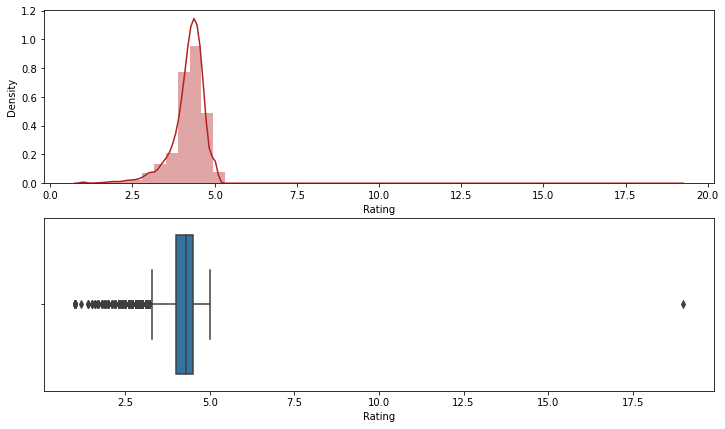

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(12,7))
sns.distplot(ps_df['Rating'],color='firebrick',ax=ax[0])
sns.boxplot(x='Rating',data=ps_df, ax=ax[1])

## **The mean of the average ratings (excluding the NaN values) comes to be 4.2.**

*  The median of the entries (excluding the NaN values) in the 'Rating' column comes to be 4.3. From this we can say that 50% of the apps have an average rating of above 4.3, and the rest below 4.3.
*   From the distplot visualizations, it is clear that the ratings are left skewed. 
*   We know that if the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.
*   Hence we will impute the NaN values in the Rating column with its median.





In [ ]:
# Replacing the NaN values in the 'Rating' colunm with its median value
ps_df['Rating'].fillna(value=median_rating,inplace=True)

## **Handling duplicates values and Manipulating dataset:**
**1).Handling the duplicates in theApp column**

In [ ]:
# Handling the error values in the Play store data
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
ps_df['App'].value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook    1
INFAMY RO                                         1
Ck Coif                                           1
CONTRACT KILLER: ZOMBIES                          1
CK Shop                                           1
                                                 ..
Block City Wars + skins export                    1
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9652, dtype: int64

In [ ]:
# Inspecting the duplicates values.
ps_df[ps_df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [ ]:
ps_df[ps_df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
# dropping duplicates from the 'App' column.
ps_df.drop_duplicates(subset = 'App', inplace = True)
ps_df.shape

(9652, 13)

In [ ]:
# Checking whether the duplicates in the 'App' column are taken care of or not
ps_df[ps_df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


We have successfully handled all the duplicate values in the App column. The resultant number of rows after droping the duplicate rows in the app column come out to be 9649.

### **2). Changing the datatype of the Last Updated column from string to datetime.**

In [ ]:
ps_df['Price'].value_counts()

0          8897
$0.99       143
$2.99       124
$1.99        73
$4.99        70
           ... 
$389.99       1
$19.90        1
$1.75         1
$14.00        1
$1.04         1
Name: Price, Length: 93, dtype: int64

To convert this column from string to float, we must first drop the $ symbol from the all the values. Then we can assign float datatype to those values.

Applying the drop_dollar function to convert the values in thePrice column from string datatype to float datatype.

In [13]:
# Creating a function drop-dollar which dropps the $ symbol if it is present and returns the output which is of float datatype.
def convert_dollar(val):
  '''
  This funtion drops the $ symbol if present and returns the value with float datatype.
  '''
  if '$' in val:
    return float(val[1:])
  else:
    return float(val)

In [14]:
ps_df[ps_df['Price']!=0].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


We have successfully converted the datatype of values in the Price column from string to float

## 3). Converting the values in theInstallscolumn from string datatype to integer datatype.

In [15]:
# Checking the contents of the 'Installs' column
ps_df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64

To convert all the values in the Installs column from string datatype to integer datatype, we must first drop the '+' symbol from all the entries if present and then we can change its datatype.

In [34]:
# Creating a function convert_plus which drops the '+' symbol if it is present and returns the output which is of integer datatype.

def convert_plus(val):
  '''
  This function drops the + symbol if present and returns the value with int datatype.
  '''
  if '+' and ',' in val:
    new = int(val[:-1].replace(',',''))
    return new
  elif '+' in val:
    new1 = int(val[:-1])
    return new1
  else:
    return int(val)

In [36]:
ps_df['Size'] = ps_df['Size'].apply(lambda x: convert_kb_to_mb(x))
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


We can see that the values in the Size column contains data with different units. 'M' stands for MB and 'k' stands for KB. To easily analyse this column, it is necessary to convert all the values to a single unit. In this case, we will convert all the units to MB.

We know that 1MB = 1024KB, to convert KB to MB, we must divide all the values which are in KB by 1024.

In [41]:
# Defining a function to convert all the entries in KB to MB and then converting them to float datatype.

def convert_kb_to_mb(val):
  '''
  This function converts all the valid entries in KB to MB and returns the result in float datatype.
  '''
  try:
    if 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024, 4)
    else:
      return val
  except:
    return val

In [42]:
# The kb_to_mb funtion applied to the size column

ps_df['Size'] = ps_df['Size'].apply(lambda x: convert_kb_to_mb(x))
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Applying the kb_to_mb function to convert the values in the Size column to a single unit of measure (MB) and the datatype from string to float.

In [48]:
# The kb_to_mb funtion applied to the size column

ps_df['Size'] = ps_df['Size'].apply(lambda x: convert_kb_to_mb(x))
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## **1).Which category of Apps from the Content Rating column are found more on playstore ?**

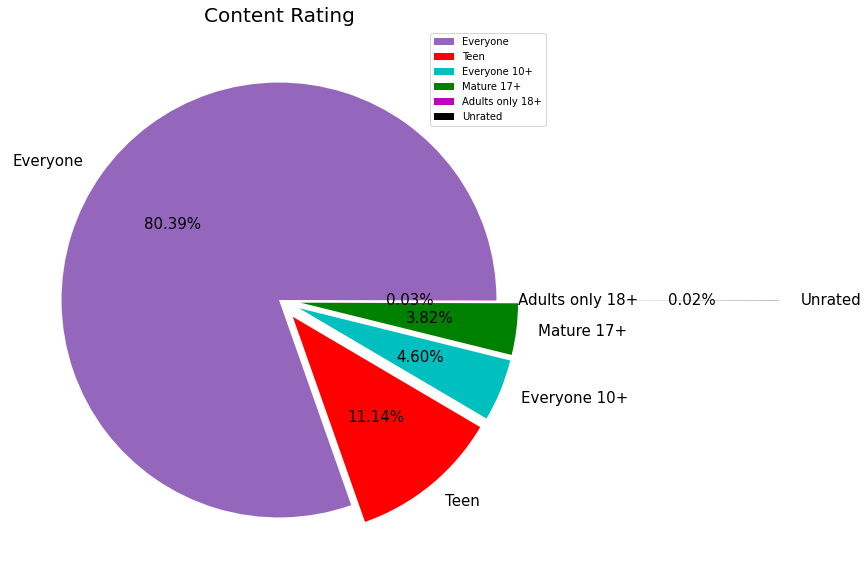

In [52]:
# Content rating of the apps
data = ps_df['Content Rating'].value_counts()
labels = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+','Adults only 18+', 'Unrated']

#create pie chart
plt.figure(figsize=(10,10))
explode=(0,0.1,0.1,0.1,0.0,1.3)
colors = ['C4', 'r', 'c', 'g', 'm', 'k']
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Content Rating',size=20,loc='center')
plt.legend()

## **2).Top categories on Google Playstore?**

In [53]:
ps_df.groupby("Category")["App"].count().sort_values(ascending= False)

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: App, dtype: int64

In [54]:
x = ps_df['Category'].value_counts()
y = ps_df['Category'].value_counts().index
x_list = []
y_list = []
for i in range(len(x)):
    x_list.append(x[i])
    y_list.append(y[i])

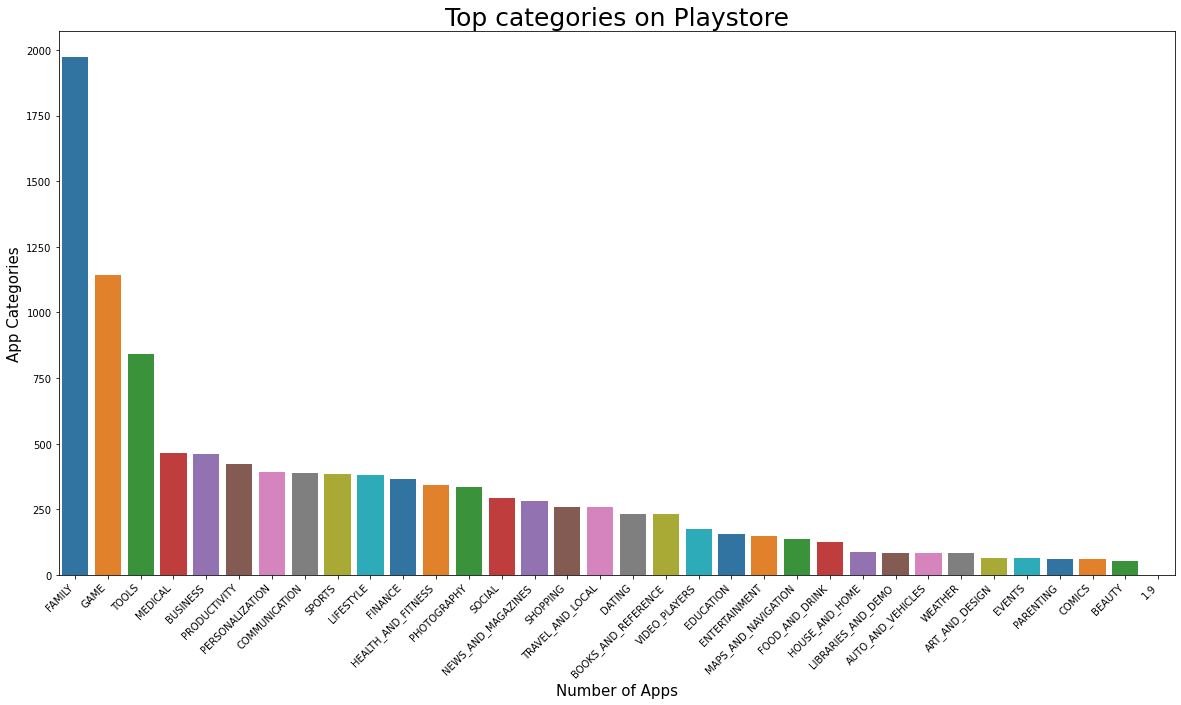

In [62]:
#Number of apps belonging to each category in the playstore
plt.figure(figsize=(20,10))
plt.xlabel('Number of Apps', size=15)
plt.ylabel('App Categories', size=15)
graph = sns.barplot(y = x_list, x = y_list, palette= "tab10")
graph.set_title("Top categories on Playstore", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right',);

# **Conclusion**

In this individual collab notebook I am facing myself in this coding challenge.    
 In this project I am analysis the data & finding a improtant data output with related with project.           
 In this removing NaN valve, finding no. app, no. of rowS & columns, top apps, different categories.

# ***Thank You***